<a href="https://colab.research.google.com/github/Jefferson-marques/PJ2/blob/master/%5BPROJETO%5D_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, index_col="ano")

In [0]:
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [0]:
# ver tamanho do dataset
df.shape

(303, 14)

In [0]:
# ver resumo estatisticos
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [0]:
# Ver todas as entradas dos dados
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
# Quantidades de pessoas que podem ou não ter doença cardiaca
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [0]:
# verificar se existe valores ausentes
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [0]:
df_brasil.head()

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672


# Visualização dos dados

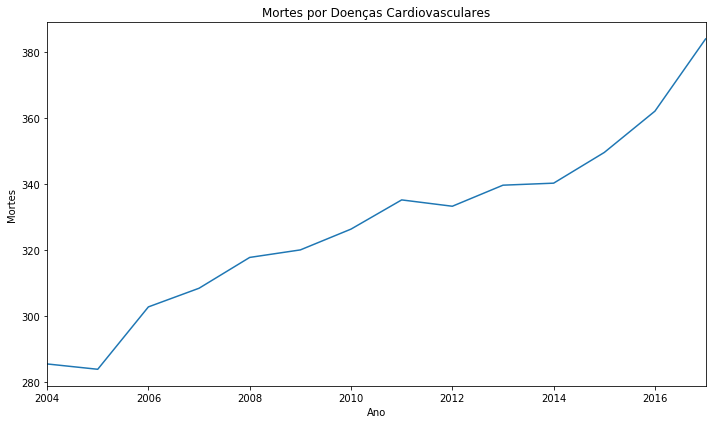

In [0]:
# Ver grafico de doenças cardiacas no Brasil
fig , ax = plt.subplots()
df_brasil["mortes_doencas_cardio"].plot(kind="line",ax=ax, figsize=(10,6))
ax.set_title("Mortes por Doenças Cardiovasculares")
ax.set_xlabel("Ano")
ax.set_ylabel("Mortes")

plt.tight_layout()


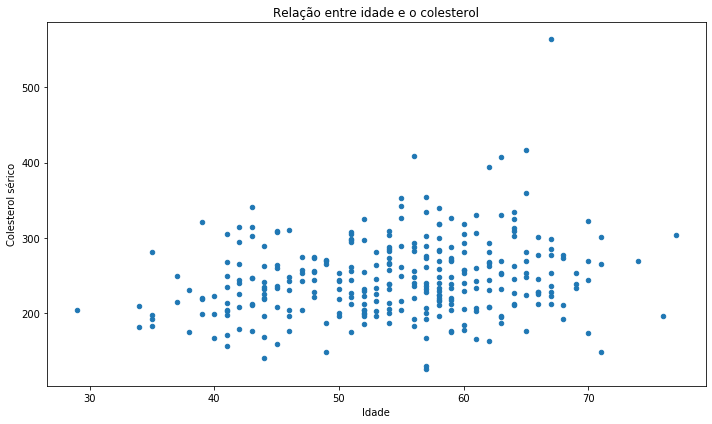

In [0]:
# grafico de dispersão em relação a idade e colesterol serico

fig, ax = plt.subplots(figsize=(10,6))

df.plot.scatter(x='age', y='chol', ax=ax)
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol sérico')
ax.set_title('Relação entre idade e o colesterol')

plt.tight_layout()

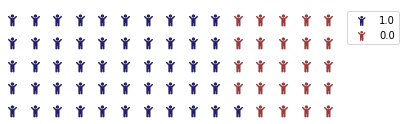

In [0]:
# grafico de waffle para comparação entre as quantidades de homens e mulheres
data = df.sex.value_counts().to_dict()
from pywaffle import Waffle

fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#232066", "#983D3D"),
                values=data, icons='child', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();




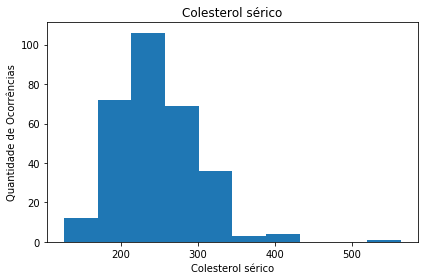

In [0]:
# grafico mostrando o colesterol serico
fig, ax = plt.subplots()

df["chol"].plot(kind="hist", ax=ax);
ax.set_xlabel('Colesterol sérico')
ax.set_ylabel('Quantidade de Ocorrências')
ax.set_title('Colesterol sérico')

plt.tight_layout()


In [0]:
# grafico de pessoas doentes e não doentes
fig = px.bar(df, 
             x="age", y="num", orientation='h', 
             title='Número de pessoas doentes e não doentes')

fig.show()

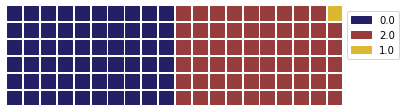

In [0]:
# grafico de resultados do eletrocardiografia de repouso
data_2 = df.restecg.value_counts().to_dict()
from pywaffle import Waffle

fig = plt.figure(
                FigureClass=Waffle,
                rows=6,
                columns=20,
                colors=("#232066", "#983D3D","#DCB732"),
                values=data_2,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

In [0]:
corr = df[['chol', 'num','ca', 'thalach','cp','trestbps','restecg','exang','oldpeak','slope']].corr()
display(corr)

,chol,num,ca,thalach,cp,trestbps,restecg,exang,oldpeak,slope
chol,1.000000,0.085164,0.123726,-0.003432,0.072319,0.130120,0.171043,0.061310,0.046564,-0.004062
num,0.085164,1.000000,0.460033,-0.417167,0.414446,0.150825,0.169202,0.431894,0.424510,0.339213
ca,0.123726,0.460033,1.000000,-0.265699,0.233117,0.097528,0.131749,0.145788,0.301067,0.110803
thalach,-0.003432,-0.417167,-0.265699,1.000000,-0.334422,-0.045351,-0.083389,-0.378103,-0.343085,-0.385601
cp,0.072319,0.414446,0.233117,-0.334422,1.000000,-0.036077,0.067505,0.384060,0.202277,0.152050
trestbps,0.130120,0.150825,0.097528,-0.045351,-0.036077,1.000000,0.146560,0.064762,0.189171,0.117382
restecg,0.171043,0.169202,0.131749,-0.083389,0.067505,0.146560,1.000000,0.084867,0.114133,0.133946
exang,0.061310,0.431894,0.145788,-0.378103,0.384060,0.064762,0.084867,1.000000,0.288223,0.257748
oldpeak,0.046564,0.424510,0.301067,-0.343085,0.202277,0.189171,0.114133,0.288223,1.000000,0.577537
slope,-0.004062,0.339213,0.110803,-0.385601,0.152050,0.117382,0.133946,0.257748,0.577537,1.000000


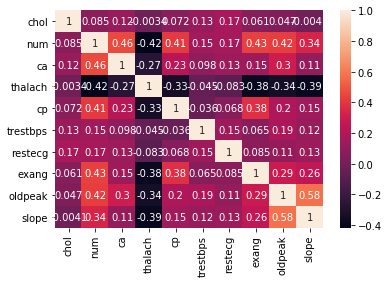

In [0]:
# Mapa de calor para correlações
sns.heatmap(corr, annot=True);

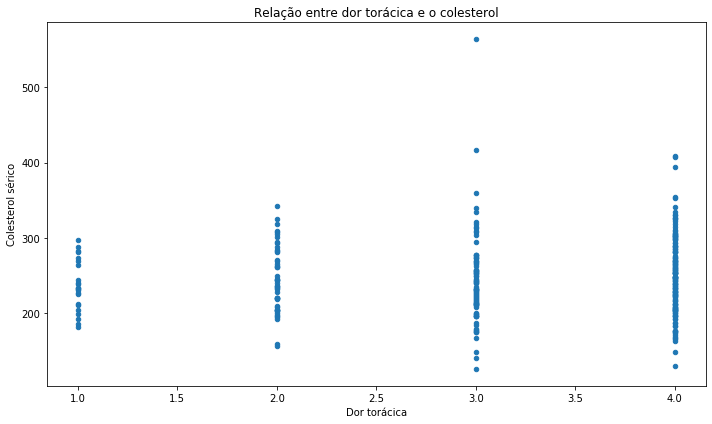

In [0]:
# grafico de relação entre dores torácicas e colesterol
fig, ax = plt.subplots(figsize=(10,6))

df.plot.scatter(x='cp', y='chol', ax=ax)
ax.set_xlabel('Dor torácica')
ax.set_ylabel('Colesterol sérico')
ax.set_title('Relação entre dor torácica e o colesterol')

plt.tight_layout()